In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
import pandas as pd

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_pose = mp.solutions.pose
mp_drawing_styles = mp.solutions.drawing_styles
pose = mp_pose.Pose()


In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def extract_keypoints(results, pos):
    leftWrist = np.array([[res.x, res.y, res.z] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(33*3)
    rightWrist = np.array([[res.x, res.y, res.z] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(33*3)
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    result = np.zeros(132)
    result[15]=pose[15]
    result[16]=pose[16]
    result = result.flatten()

    return np.concatenate([result])
    
def extract_keypoints1(results, pos):
    leftWrist = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    rightWrist = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    leftElbow = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    rightElbow = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    leftShoulder = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    rightShoulder = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(4)

    leftWrist = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    rightWrist = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    leftElbow = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    re = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    ls = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    rs = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(4)

    leftWrist = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    rightWrist = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    leftElbow = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    re = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    ls = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    rs = np.array([[res.x, res.y, pos, 1] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    
    golfdataset = pd.DataFrame([[leftWrist[0], leftWrist[1], rightWrist[0], rightWrist[1], leftElbow[0], leftElbow[1], rightElbow[0], rightElbow[1], leftShoulder[0], leftShoulder[1], rightShoulder[0], rightShoulder[1], leftWrist[2], leftWrist[3]]], columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', "Frame_Sequence", "Good_Bad"])
    golfdataset.to_csv('GolfSEDataset.csv', mode='a', index=False, header=False)
    return np.concatenate([leftWrist])

def extract_keypoints2(landmarks):
  wrist_keypoints = []
  # Loop through the landmarks in the pose landmark object
  for landmark in landmarks:
    # Check if the landmark is a wrist keypoint
    if landmark.type == 'WRIST':
      # Extract the x, y, z, and visibility values for the wrist keypoint
      x, y, z, visibility = landmark.x, landmark.y, landmark.z, landmark.visibility
      wrist_keypoints.append([x, y, z, visibility])
  return np.array(wrist_keypoints)

In [7]:
DATA_PATH = os.path.join('./Datasets') 

# Actions that we try to detect
actions = np.array(['Good', 'Normal'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 60

# Folder start
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [6]:
import google.protobuf
google.protobuf.__file__

'c:\\Users\\Crim\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\google\\protobuf\\__init__.py'

In [7]:
def extract_userInputLandmarks(results, pos):
    lw = np.array([[res.x, res.y] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(2)
    rw = np.array([[res.x, res.y] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST.value]]]).flatten() if results.pose_landmarks else np.zeros(2)
    le = np.array([[res.x, res.y] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(2)
    re = np.array([[res.x, res.y] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW.value]]]).flatten() if results.pose_landmarks else np.zeros(2)
    ls = np.array([[res.x, res.y] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(2)
    rs = np.array([[res.x, res.y, pos] for res in [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]]]).flatten() if results.pose_landmarks else np.zeros(4)
    
    # golfdataset = pd.DataFrame([[lw[0], lw[1], rw[0], rw[1], le[0], le[1], re[0], re[1], ls[0], ls[1], rs[0], rs[1], rs[2], rs[3]]], columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', "Frame_Sequence"])
    return np.concatenate([lw, rw, le, re, ls, rs])

In [8]:
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

In [9]:

# Set mediapipe model
pos = 0 
start_folder = 1
number = 8
VIDEO_PATH = "./assets/videos/Good/"+str(number)+".mp4"
cap = cv2.VideoCapture(VIDEO_PATH)
count = 0
start = False
 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        success, frame = cap.read()
        if not success:
            break
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        image = cv2.resize(image,(700,700))
        #For landmarks drawing
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        if start:
            keypoints = extract_userInputLandmarks(results, pos)
            B = np.reshape(keypoints, (-1,13))
            rating = clf.predict(B)
            print(rating)
            cv2.putText(image, "Left & Right Arm: ", (15,200), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
            if(rating[0] == 0):
                cv2.putText(image, "Professional", (200,200), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
            else:
                cv2.putText(image, "Amateur", (200,200), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('s'):
            start = True
            print("Starting to collect for folder "+ str(number))
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
    pos = 0
cap.release()
cv2.destroyAllWindows()

In [10]:

# Set mediapipe model
pos = 0 
start_folder = 1
number = 4
VIDEO_PATH = "./assets/videos/Amateur/"+str(number)+".mp4"
cap = cv2.VideoCapture(VIDEO_PATH)
count = 0
start = False
 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        success, frame = cap.read()
        if not success:
            break
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        image = cv2.resize(image,(700,700))
        #For landmarks drawing
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        if start:
            keypoints = extract_keypoints1(results, count)
            count+=1
            if count >= sequence_length:
                break
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('s'):
            start = True
            print("Starting to collect for folder "+ str(number))
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
    pos = 0
cap.release()
cv2.destroyAllWindows()

In [13]:
num = 1


while num < 51:
    image = cv2.imread("./Dataset/Takeaway/"+str(num)+".PNG")
# Define the Mediapipe Pose model
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True)

    # Process the image and get the pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw the pose landmarks on the image
    if results.pose_landmarks is not None:
        mp_drawing = mp.solutions.drawing_utils
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Display the image with the pose landmarks
        cv2.imshow('Pose Landmarks', annotated_image)
        if cv2.waitKey(0) & 0xFF == ord('q'):
            num+=1
            cv2.destroyAllWindows()
            continue
        if cv2.waitKey(0) & 0xFF == ord('e'):
            break
    else:
        print('Error: Failed to detect pose landmarks')
cv2.destroyAllWindows()


In [ ]:
dataset = pd.read_csv("C:\\Users\\Crim\\Desktop\\RESEARCH_THESIS\\golfpose\\GolfSEDataset.csv")
dataset.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,Frame_Sequence,label
0,0.451338,0.482547,0.414248,0.495005,0.480569,0.427259,0.403131,0.434499,0.495657,0.351270,0.403553,0.358244,0.0,0.0
1,0.449470,0.481214,0.410542,0.488988,0.482549,0.427193,0.397777,0.431495,0.495652,0.352346,0.402750,0.358247,1.0,0.0
2,0.419107,0.480355,0.390254,0.481632,0.476458,0.431436,0.391264,0.426409,0.494181,0.354471,0.402578,0.356171,2.0,0.0
3,0.423709,0.454025,0.396479,0.462087,0.471408,0.428178,0.392851,0.419756,0.492769,0.353991,0.402603,0.352437,3.0,0.0
4,0.430096,0.429913,0.366483,0.453425,0.466780,0.417237,0.382884,0.412887,0.491477,0.353707,0.402756,0.350907,4.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

# Load the dataset
df = pd.read_csv('GolfSEDataset.csv' )
X = df[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', "Frame_Sequence"]]
X = X.values
print(X)
y = df[['label']]
y = y.values

[[ 0.45133847  0.48254746  0.41424793 ...  0.40355271  0.35824376
   0.        ]
 [ 0.44946957  0.4812139   0.41054192 ...  0.40275007  0.35824707
   1.        ]
 [ 0.41910654  0.48035493  0.39025405 ...  0.40257758  0.35617089
   2.        ]
 ...
 [ 0.501589    0.39378124  0.47170964 ...  0.58663976  0.42707133
  57.        ]
 [ 0.49230418  0.39306727  0.47121638 ...  0.58764738  0.42653275
  58.        ]
 [ 0.49304733  0.39311484  0.47007746 ...  0.57057065  0.42679322
  59.        ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# initialize a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# initialize an SVM model with RBF kernel
clf = SVC(kernel='rbf', gamma=0.1, C=1)

# fit the model to the scaled training data
clf.fit(X_train_scaled, y_train)

# transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# make predictions on the scaled test data
y_pred = clf.predict(X_test_scaled)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversio

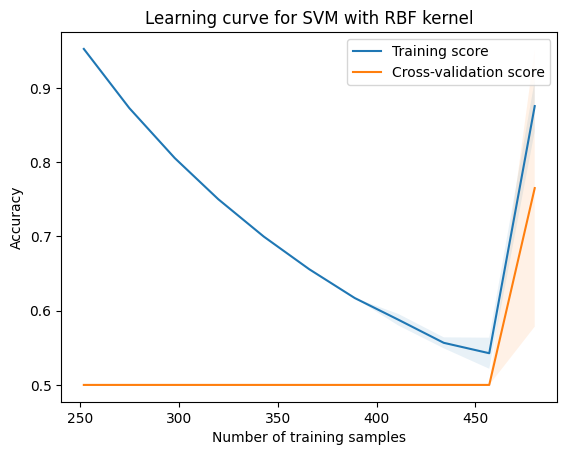

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 20)
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, train_sizes=train_sizes, cv=5)

# calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend(loc='best')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning curve for SVM with RBF kernel')
plt.show()

In [ ]:
created_test = [[0.3, 0.3, 0.4, 0]]
created_test

[[0.3, 0.3, 0.4, 0]]

In [ ]:
y_pred = clf.predict(X_test_scaled)
print(y_pred)

[1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94
